In [1]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg','pdf')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [54]:
dt = 3.6
dx = 0.1

t = np.arange(0, 0.5*3600 + dt, dt)
x = np.arange(0, 10 + dx, dx)

Nx = len(x) - 1
Nt = len(t) - 1

In [55]:
Tmin = 500
Tmax = 700
eps = 0.22
DbyH = 0.5
d = 0.015
u = 1.1e-3

In [56]:
CFL = dt*u/dx
CFL

0.039599999999999996

In [57]:
Nx

100

In [58]:
Tin = Tmax

Tf = np.zeros((Nt+1, Nx+1))
Ts = np.zeros((Nt+1, Nx+1))

# ICs
Tf[0,:] = Tmin
Ts[0,:] = Tmin

# BCs
Tf[:,0] = Tin 

In [59]:
rhof = 1977
cpf = 900
eps = 0.22
rhos = rhof
cps = cpf
Lambda = 0.29

In [60]:
alpha = eps*rhof*cpf
beta = eps*Lambda
gamma = (1-eps)*rhos*cps
hv = 66

r = beta/alpha*dt/(2*dx**2)
s = 0.25*dt/dx*u
sigma1 = hv/alpha*dt
sigma2 = beta/alpha*dt/(2*dx**2)

In [61]:
diagonals = [np.ones(Nx)*(1 + 2*r), np.ones(Nx)*(s - r), np.ones(Nx)*(-s - r)]
offsets = [0, 1, -1]
A = sp.sparse.diags(diagonals, offsets).toarray()
A[-1,-2] = -2*r

A = sp.sparse.csr_matrix(A)
A_inv = sp.sparse.linalg.inv(A)

In [62]:
diagonals = [np.ones(Nx)*(1 - sigma1 - 2*r), np.ones(Nx)*(r - s), np.ones(Nx)*(r + s)]
offsets = [0, 1, -1]
B = sp.sparse.diags(diagonals, offsets).toarray()
B[-1,-2] = 2*r

B = sp.sparse.csr_matrix(B)

In [63]:
bc0 = np.zeros(Nx)
bc1 = np.zeros(Nx)

bc0[0] = Tin
bc1[0] = Tin

In [64]:
for i in range(1,Nt+1):
        
    Tf[i,1:] = A_inv.dot(B.dot(Tf[i-1,1:]) + (r+s)*(bc0 + bc1) +\
                sigma1*Ts[i-1,1:])
    
    Ts[i,1:] = sigma2*(Tf[i-1,1:] - Ts[i-1,1:]) + Tf[i-1,1:]    
    
#        Update BCs    
    Ts[i,0] = Ts[i,1]
    Ts[i,-1] = Ts[i,-2]

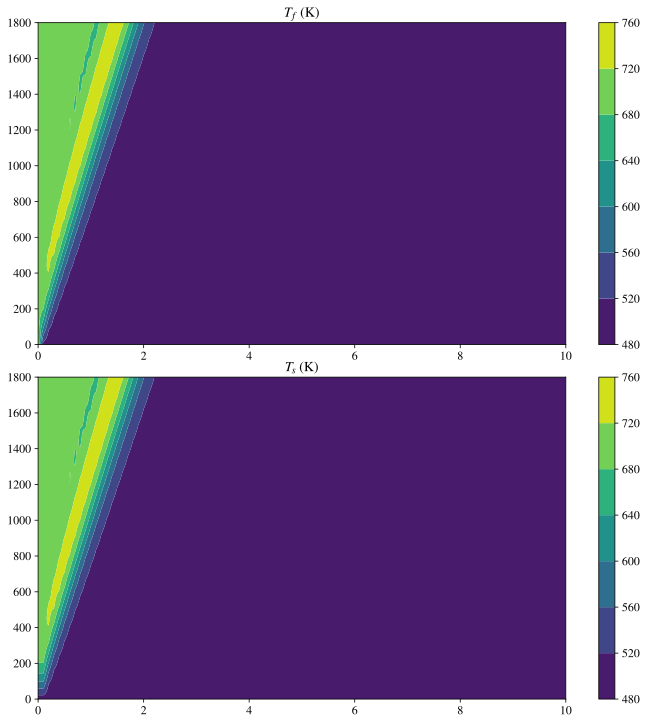

In [65]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex='row')
(ax1, ax2) = axs

cs1 = ax1.contourf(x, t, Tf)
plt.tight_layout()
plt.colorbar(cs1)
ax1.set_title(r'$T_f$ (K)', fontsize=14)

cs2 = ax2.contourf(x, t, Ts)
plt.colorbar(cs2)
ax2.set_title(r'$T_s$ (K)', fontsize=14)

# plt.colorbar()
# plt.xlim([0, 0.05])
# plt.ylim([0, 10])

plt.show()

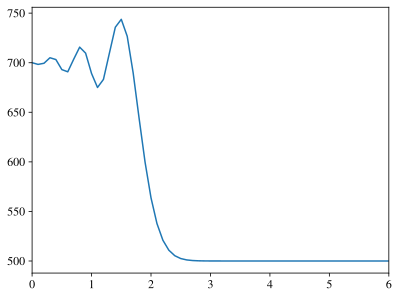

In [66]:
plt.plot(x, Tf[-1,:])
plt.xlim([0, 6])
plt.show()